#MLP

##1. Import Library

In [113]:
import numpy as np
import pandas as pd
import random 
import seaborn 
import matplotlib.pyplot as plt
import matplotlib.cm as cm #UNTUK PEMILIHAN WARNA

from matplotlib.pyplot import figure

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier

##2. Data Understanding

## 2.1 Import Data

In [114]:
wine = pd.read_csv("WineQT.csv")
wine = wine.loc[:500, ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density", "pH", "sulphates", "alcohol", "quality"]]
wine.head(501)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
496,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.9986,3.11,0.62,10.8,6
497,10.6,1.02,0.43,2.9,0.076,26.0,88.0,0.9984,3.08,0.57,10.1,6
498,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.9972,3.47,0.67,9.5,6
499,7.0,0.64,0.02,2.1,0.067,9.0,23.0,0.9970,3.47,0.67,9.4,6


## 2.2 Data Description

In [115]:
print(wine.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count     501.000000        501.000000   501.000000      501.000000   
mean        8.957685          0.531447     0.315988        2.646108   
std         1.995637          0.178167     0.210584        1.399889   
min         4.600000          0.180000     0.000000        1.200000   
25%         7.600000          0.400000     0.140000        1.900000   
50%         8.600000          0.520000     0.300000        2.300000   
75%        10.200000          0.635000     0.490000        2.700000   
max        15.900000          1.330000     1.000000       15.500000   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide     density  \
count  501.000000           501.000000            501.000000  501.000000   
mean     0.090691            14.703593             49.383234    0.997642   
std      0.052470             9.761376             33.721341    0.001815   
min      0.034000             1.000000              8.00

## Split Data

In [116]:
X = wine.loc[:500, ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density", "pH", "sulphates", "alcohol"]] #menginisialisasikan data
y = wine.quality  #kolom target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
496,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.9986,3.11,0.62,10.8
497,10.6,1.02,0.43,2.9,0.076,26.0,88.0,0.9984,3.08,0.57,10.1
498,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.9972,3.47,0.67,9.5
499,7.0,0.64,0.02,2.1,0.067,9.0,23.0,0.9970,3.47,0.67,9.4


##3. Plotting Data

Text(0.5, 1.0, 'pH & sulphates')

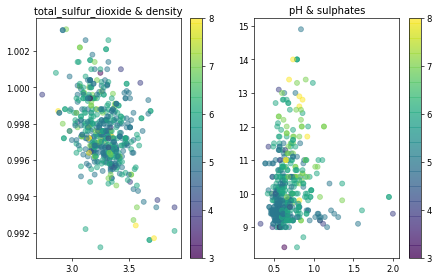

In [117]:
n_sample = X.shape
n_feature = y.shape

figure(figsize=(18, 18), dpi=60) #dpi= ukuran figure yang ditampilkan

# plt.subplot(3, 4, 1) #jumlah kotak yg ingin ditampilkan kebawah dan kesamping, 1 adalah index
# scatter_plot = plt.scatter(wine.fixed_acidity, wine.volatile_acidity, alpha=0.5, c=wine.quality) #alpha transparasi titik yang akan ditampilkan 

# plt.colorbar(ticks = ([0,1,2,3,4,5,6,7,8,9,10])) #tick bar yang disamping M0 F1 I2
# plt.title("fixed_acidity & volatile_acidity")

# plt.subplot(3, 4, 2)
# scatter_plot = plt.scatter(wine.citric_acid, wine.residual_sugar, alpha=0.5, c=wine.quality)

# plt.colorbar(ticks = ([0,1,2,3,4,5,6,7,8,9,10]))
# plt.title("citric_acid & residual_sugar")

# plt.subplot(3, 4, 3)
# scatter_plot = plt.scatter(wine.chlorides, wine.free_sulfur_dioxide, alpha=0.5, c=wine.quality)

# plt.colorbar(ticks = ([0,1,2,3,4,5,6,7,8,9,10]))
# plt.title("chlorides & free_sulfur_dioxide")

plt.subplot(3, 4, 1)
scatter_plot = plt.scatter(wine.pH, wine.density, alpha=0.5, c=wine.quality)

plt.colorbar(ticks = ([0,1,2,3,4,5,6,7,8,9,10]))
plt.title("total_sulfur_dioxide & density")

plt.subplot(3, 4, 2)
scatter_plot = plt.scatter(wine.sulphates, wine.alcohol, alpha=0.5, c=wine.quality)

plt.colorbar(ticks = ([0,1,2,3,4,5,6,7,8,9,10]))
plt.title("pH & sulphates")



## Plot of Distribution Data

In [118]:
from pandas.plotting import scatter_matrix

scatter_matrix(wine, alpha=0.8, figsize=(80,80))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

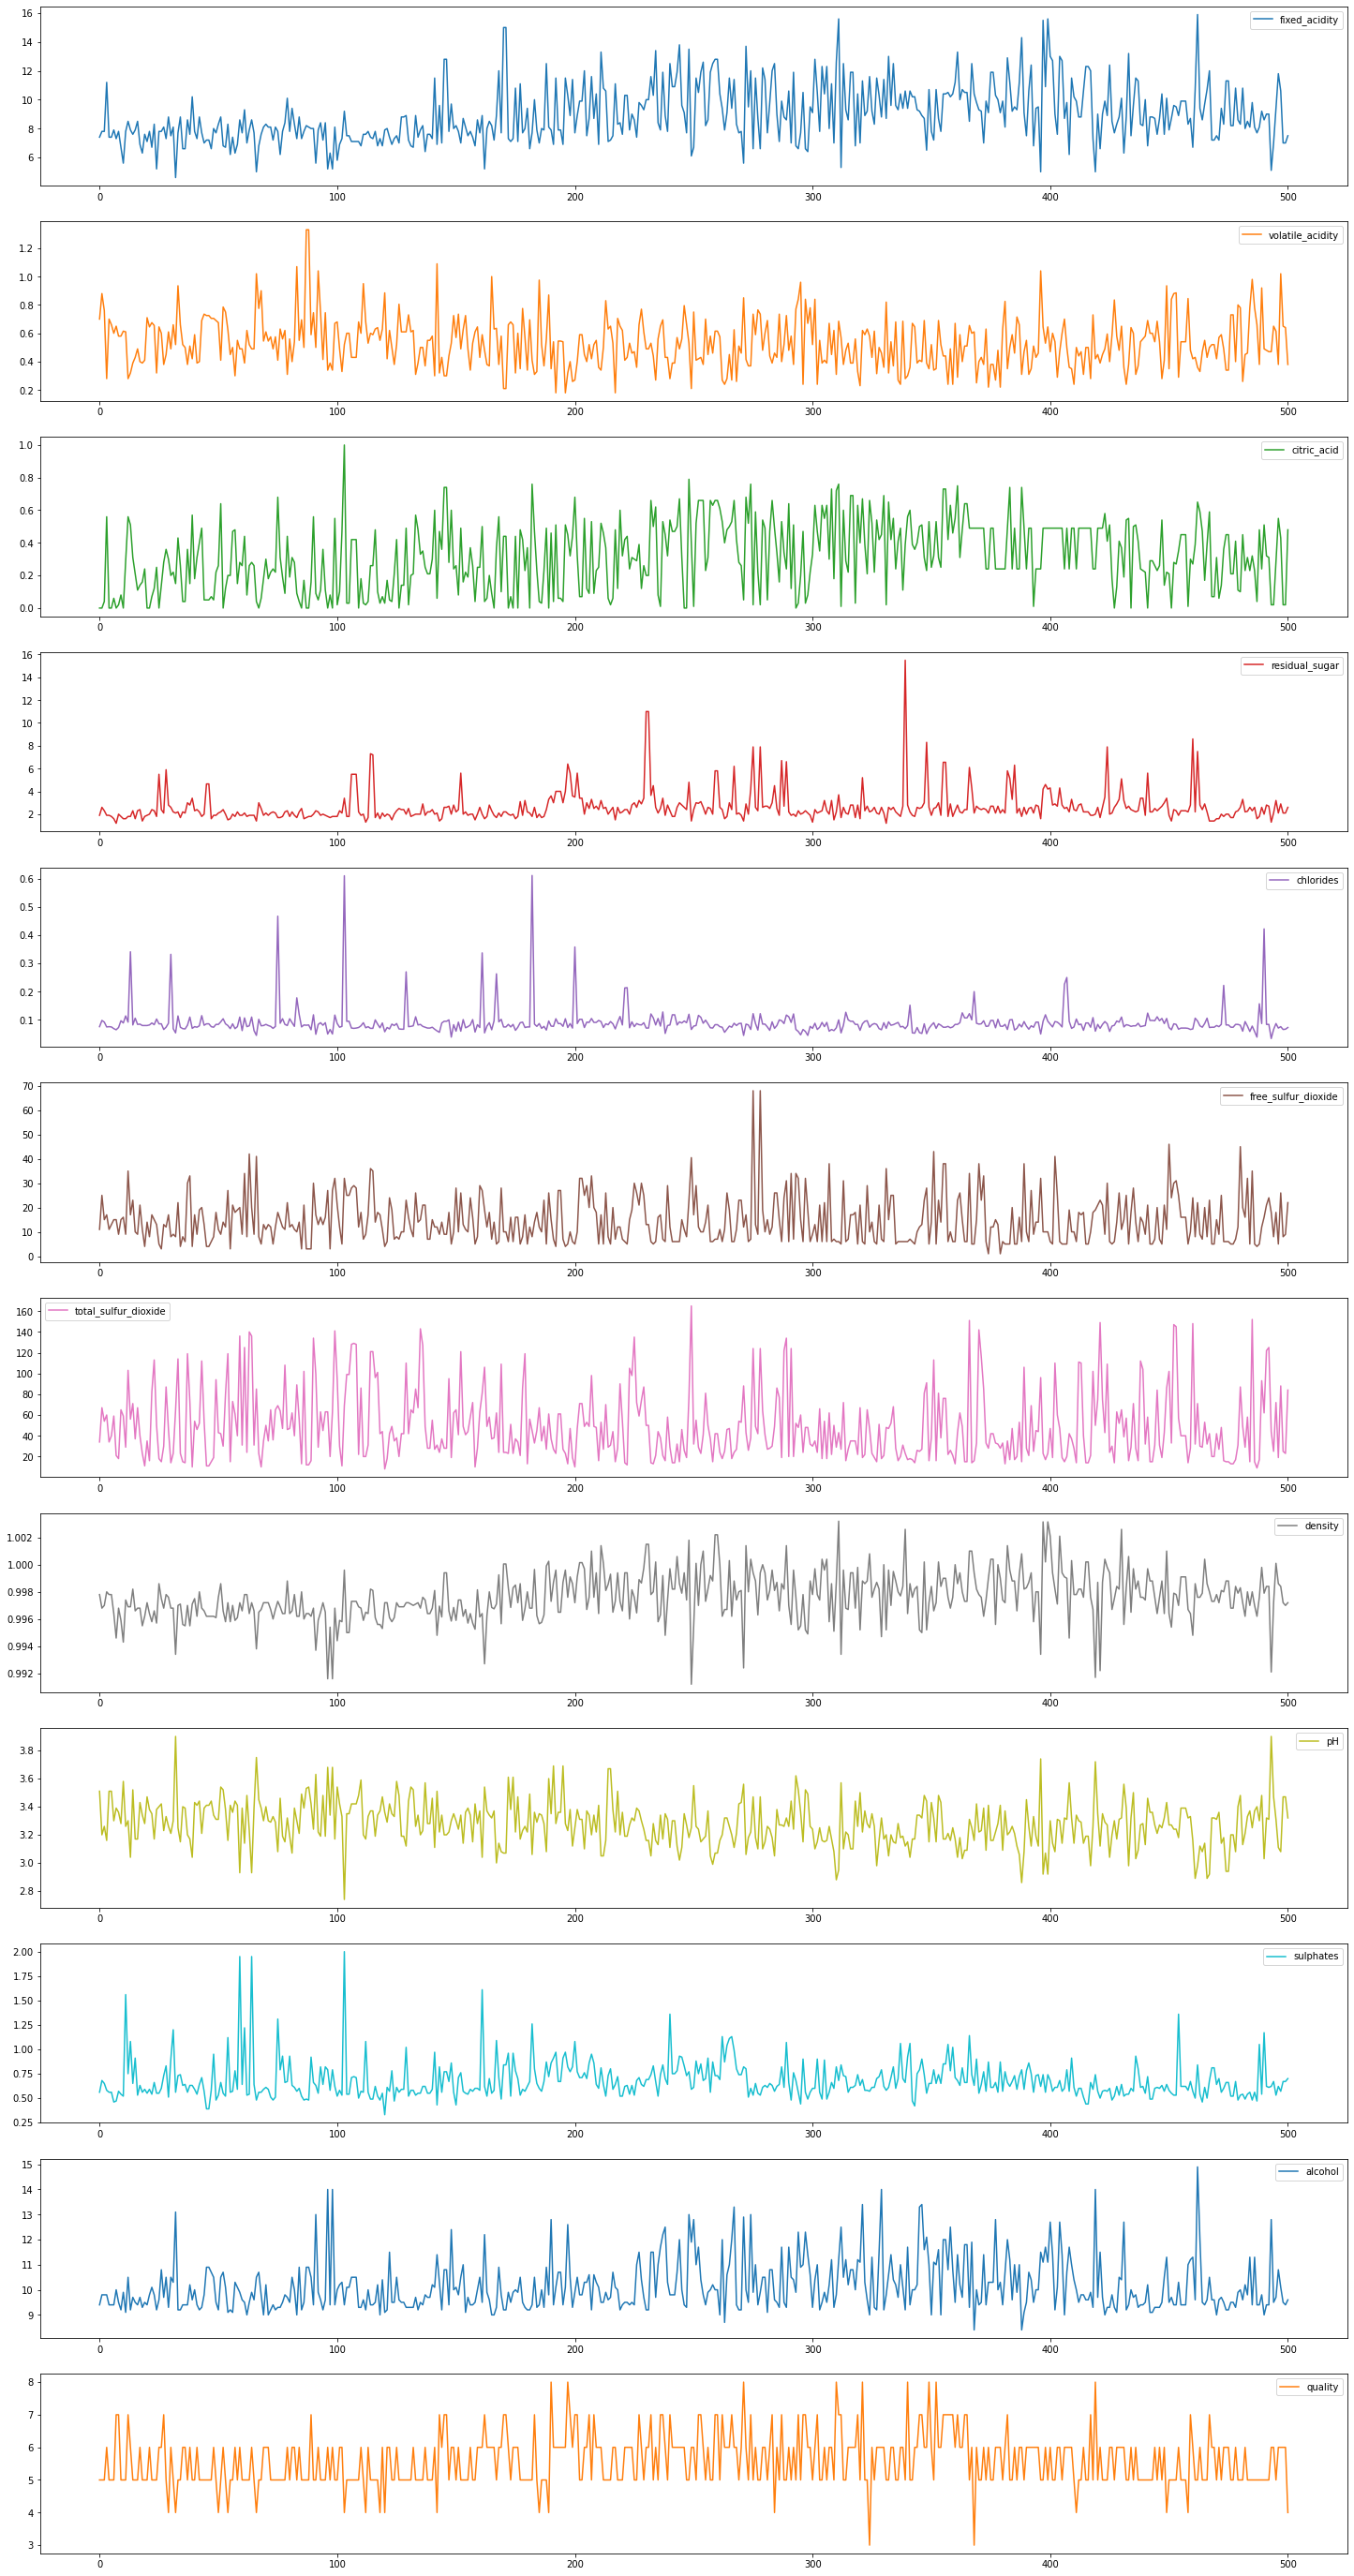

In [119]:
wine.plot(subplots=True, figsize=(25,50), sharex=False, sharey=False)
plt.show()

## Split Data

## Implementasi MLP

### Optimizer Adam

In [120]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1)

###Prediction

In [121]:
prediction = clf.predict(X_test)
print(prediction)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [122]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [123]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [124]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1)

In [125]:
prediction = clf.predict(X_test)
print(prediction)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [126]:
print(y_test)

183    7
306    5
257    5
389    5
225    5
      ..
95     5
407    6
94     5
128    5
201    7
Name: quality, Length: 101, dtype: int64


In [127]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Multi-layer Perceptron is: 0.46534653465346537


In [128]:
mymodel = models.Sequential()
mymodel.add(layers.Dense(32, activation='sigmoid', input_shape=([11])))
mymodel.add(layers.Dense(64, activation='relu'))
mymodel.add(layers.Dense(128, activation='relu'))
mymodel.add(layers.Dense(9, activation='softmax'))

In [129]:
mymodel.compile(optimizer='RMSProp',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [130]:
mymodel.fit(X_train, train_labels, epochs=50, batch_size=100)

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 1.8151 - accuracy: 0.3975
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.3830 - accuracy: 0.4650
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 1.2494 - accuracy: 0.4700
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 1.2011 - accuracy: 0.4850
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 1.1711 - accuracy: 0.4625
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 1.1502 - accuracy: 0.4725
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 1.1479 - accuracy: 0.4925
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 1.1360 - accuracy: 0.5400
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 1.1216 - accuracy: 0.5075
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 1.1169 - accuracy: 0.5025
Epoch 11/50
4/4 [======================

In [131]:
test_loss, test_acc = mymodel.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

4/4 [==============================] - 0s 3ms/step - loss: 1.0710 - accuracy: 0.5545
Test Accuracy:  0.5544554591178894 
Test Loss:  1.0709829330444336
